# Happiness Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# A. Summarize data 

Total Number of Data in the happiness_data.csv

In [3]:
df = pd.read_csv("/Users/yeshwanth/Documents/Applied ML/Assignment_01/happiness_data.csv")

number_of_rows,number_of_coloumns = df.shape

print(f"Number of Rows: {number_of_rows} and Number of coloumns {number_of_coloumns}")



Number of Rows: 1949 and Number of coloumns 11


Attributes/features are continuous valued

In [4]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
print(f"The Features that have continous values {list(continuous_features)}")
continuous_column_values = list(continuous_features)

The Features that have continous values ['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


attributes that are categorical

In [5]:
categorical_features  = df.select_dtypes(include = ['object','category']).columns

print(f"The Features that categorical values {list(categorical_features)}")

The Features that categorical values ['Country name']


# B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.
 Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

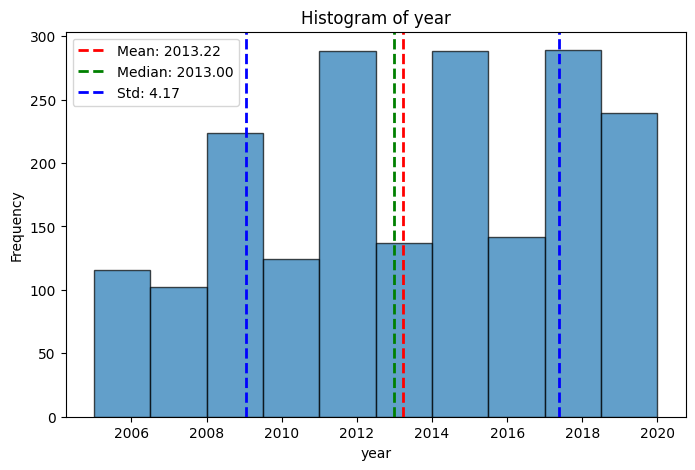

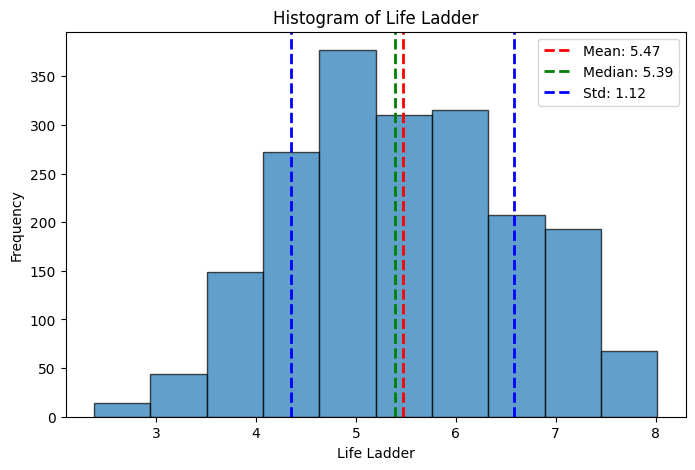

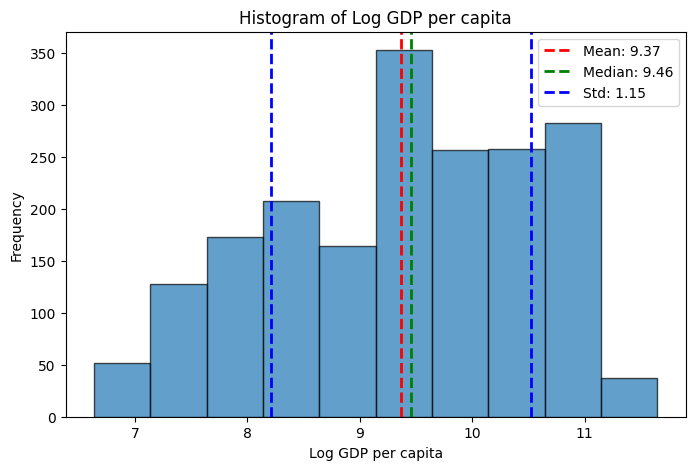

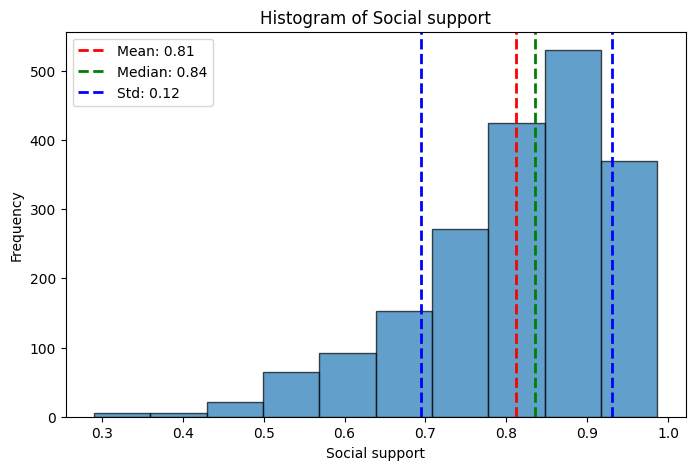

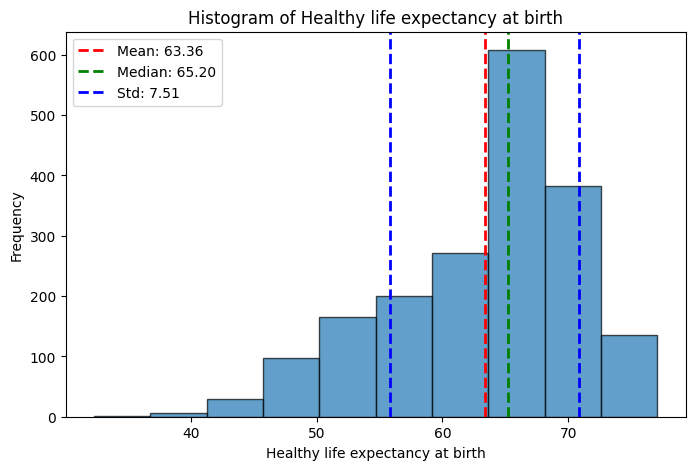

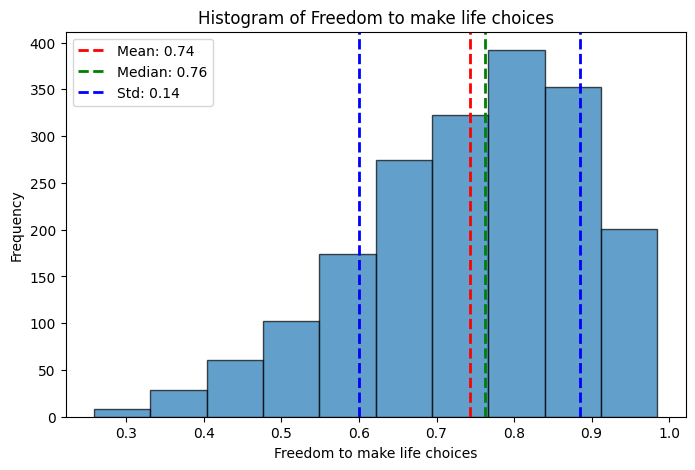

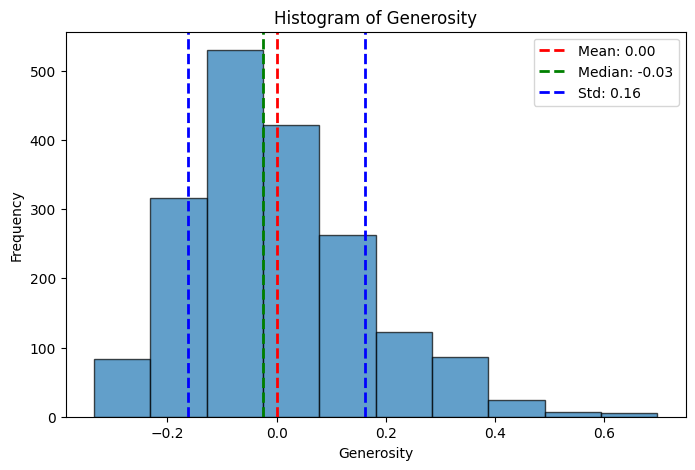

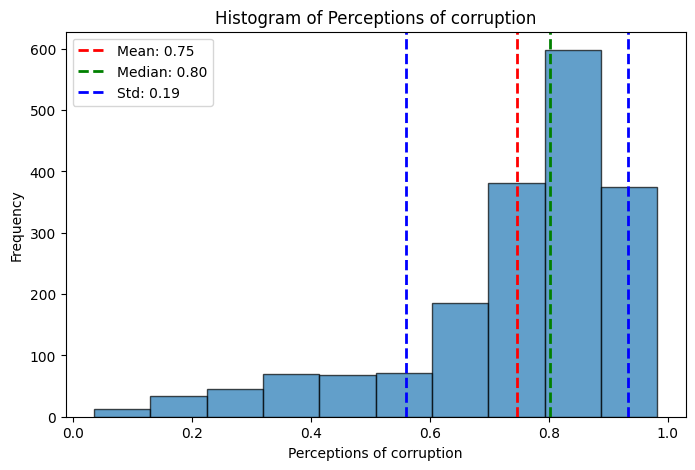

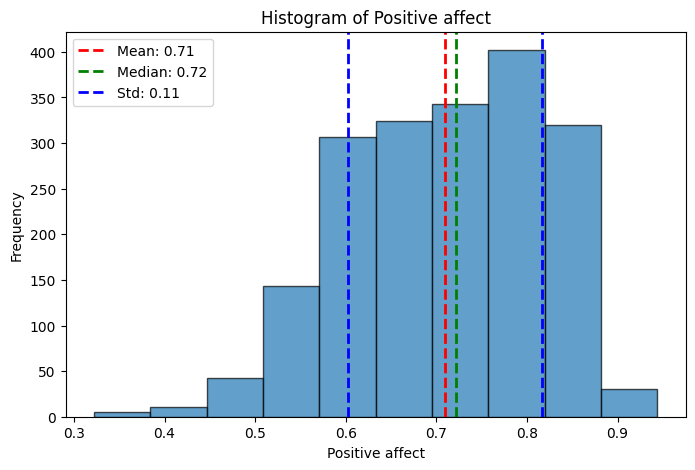

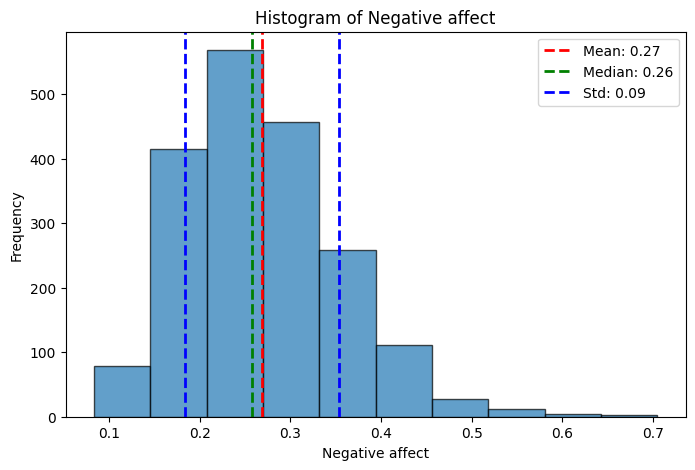

{'year': {'mean': 2013.216008209338,
  'median': 2013.0,
  'std': 4.16682781957226},
 'Life Ladder': {'mean': 5.46670548999487,
  'median': 5.386,
  'std': 1.1157105016473905},
 'Log GDP per capita': {'mean': 9.368452692106638,
  'median': 9.46,
  'std': 1.154084029731952},
 'Social support': {'mean': 0.8125521694214877,
  'median': 0.8354999999999999,
  'std': 0.11848163156602372},
 'Healthy life expectancy at birth': {'mean': 63.35937381203802,
  'median': 65.2,
  'std': 7.51024461823635},
 'Freedom to make life choices': {'mean': 0.7425576421491914,
  'median': 0.763,
  'std': 0.14209286577975108},
 'Generosity': {'mean': 0.00010322580645161109,
  'median': -0.025500000000000002,
  'std': 0.16221532880635953},
 'Perceptions of corruption': {'mean': 0.7471250679717237,
  'median': 0.802,
  'std': 0.18678881844350428},
 'Positive affect': {'mean': 0.7100031136481577,
  'median': 0.722,
  'std': 0.10709993290814633},
 'Negative affect': {'mean': 0.26854423176409725,
  'median': 0.258,


In [6]:
import matplotlib.pyplot as plt

# Function to plot histograms with statistical values for each continuous column
def plot_histograms_with_stats(df):
    stats_summary = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(8, 5))

        # Plot histogram
        plt.hist(df[column].dropna(), bins=10, edgecolor='black', alpha=0.7)

        # Calculate statistics
        mean_value = df[column].mean()
        median_value = df[column].median()
        std_value = df[column].std()

        # Add statistical values to the plot
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        plt.axvline(mean_value + std_value, color='blue', linestyle='dashed', linewidth=2, label=f'Std: {std_value:.2f}')
        plt.axvline(mean_value - std_value, color='blue', linestyle='dashed', linewidth=2)

        # Set title and labels
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()

        # Collect stats
        stats_summary[column] = {'mean': mean_value, 'median': median_value, 'std': std_value}

        # Show the plot
        plt.show()

    return stats_summary

# Call the function and display histograms along with statistical summaries
stats_summary = plot_histograms_with_stats(df)

# Display the statistical summary
stats_summary

Special Treatment :

	•	Generosity: This attribute has a wider range of values, including both negative and positive values. You may consider treating negative values separately, as they could represent data entry errors or special cases.
	•	Healthy Life Expectancy at Birth: There’s significant variation in life expectancy, which may require normalization or scaling to ensure it doesn’t overly influence model performance if used in a machine learning context.
	•	Perceptions of Corruption: Although this feature is clustered toward higher corruption levels, its broader range suggests it may need special attention, such as log transformation, to manage skewness.

For features like Generosity and Perceptions of Corruption, special treatment such as handling negative values or applying transformations might help in smoothing out skewed distributions before analysis

# C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [7]:
import seaborn as sns

In [8]:
print(continuous_column_values)

['year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']


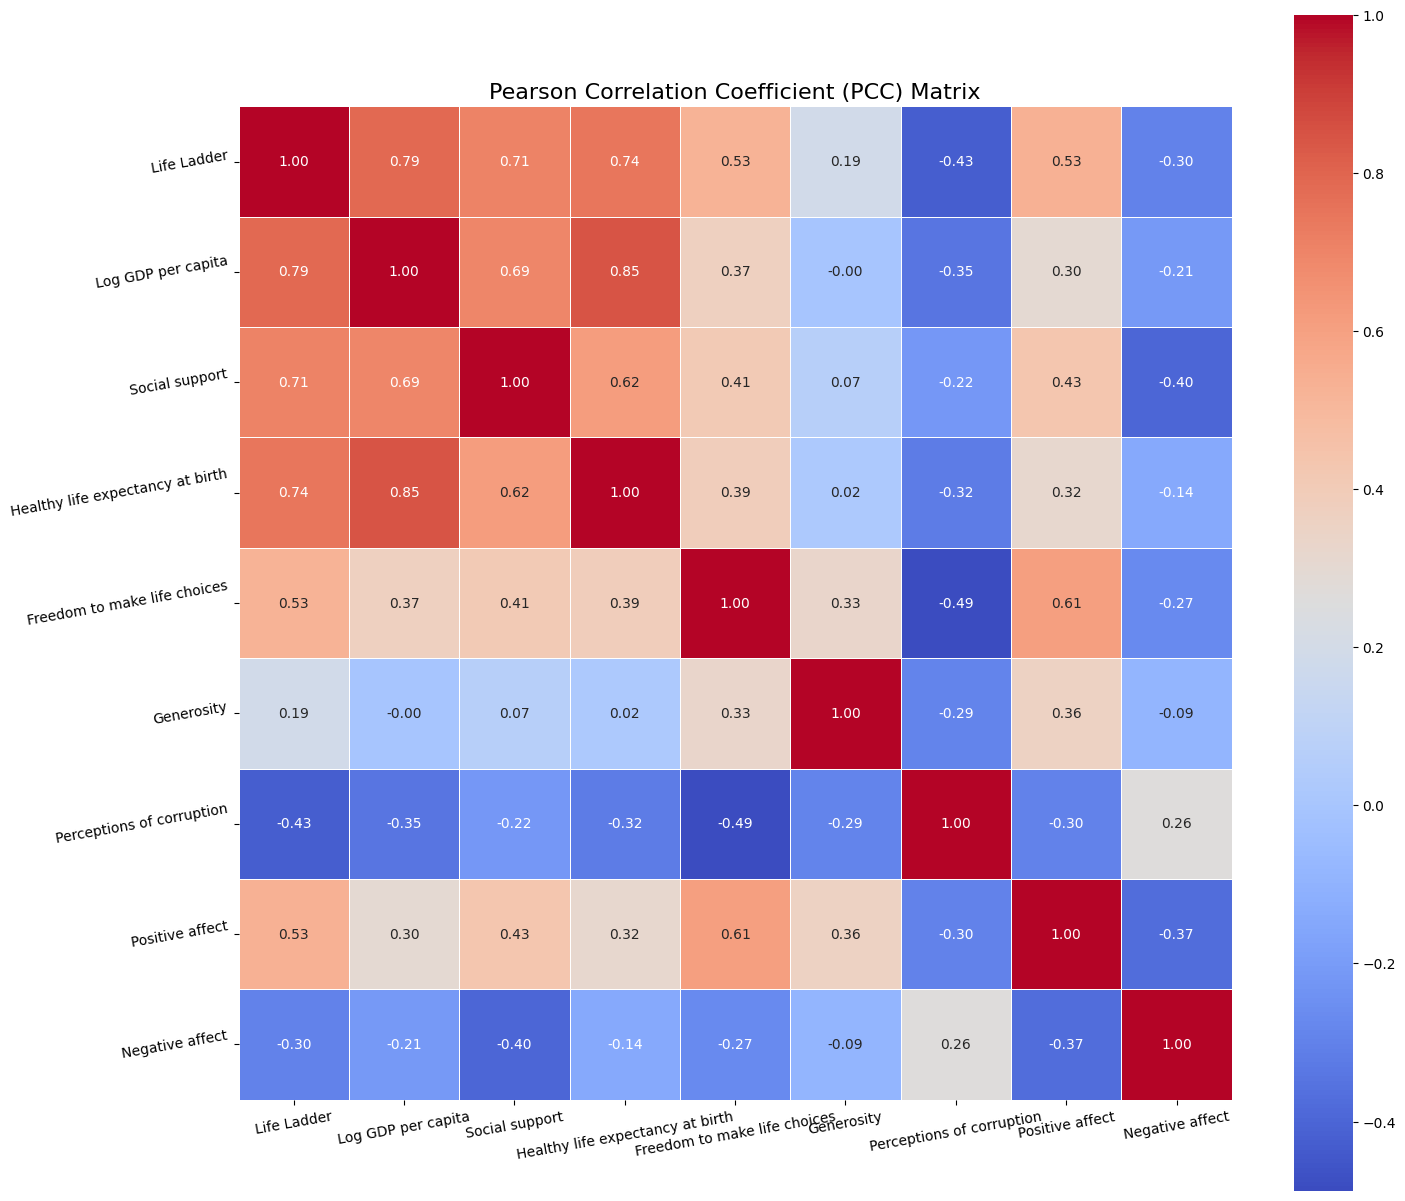

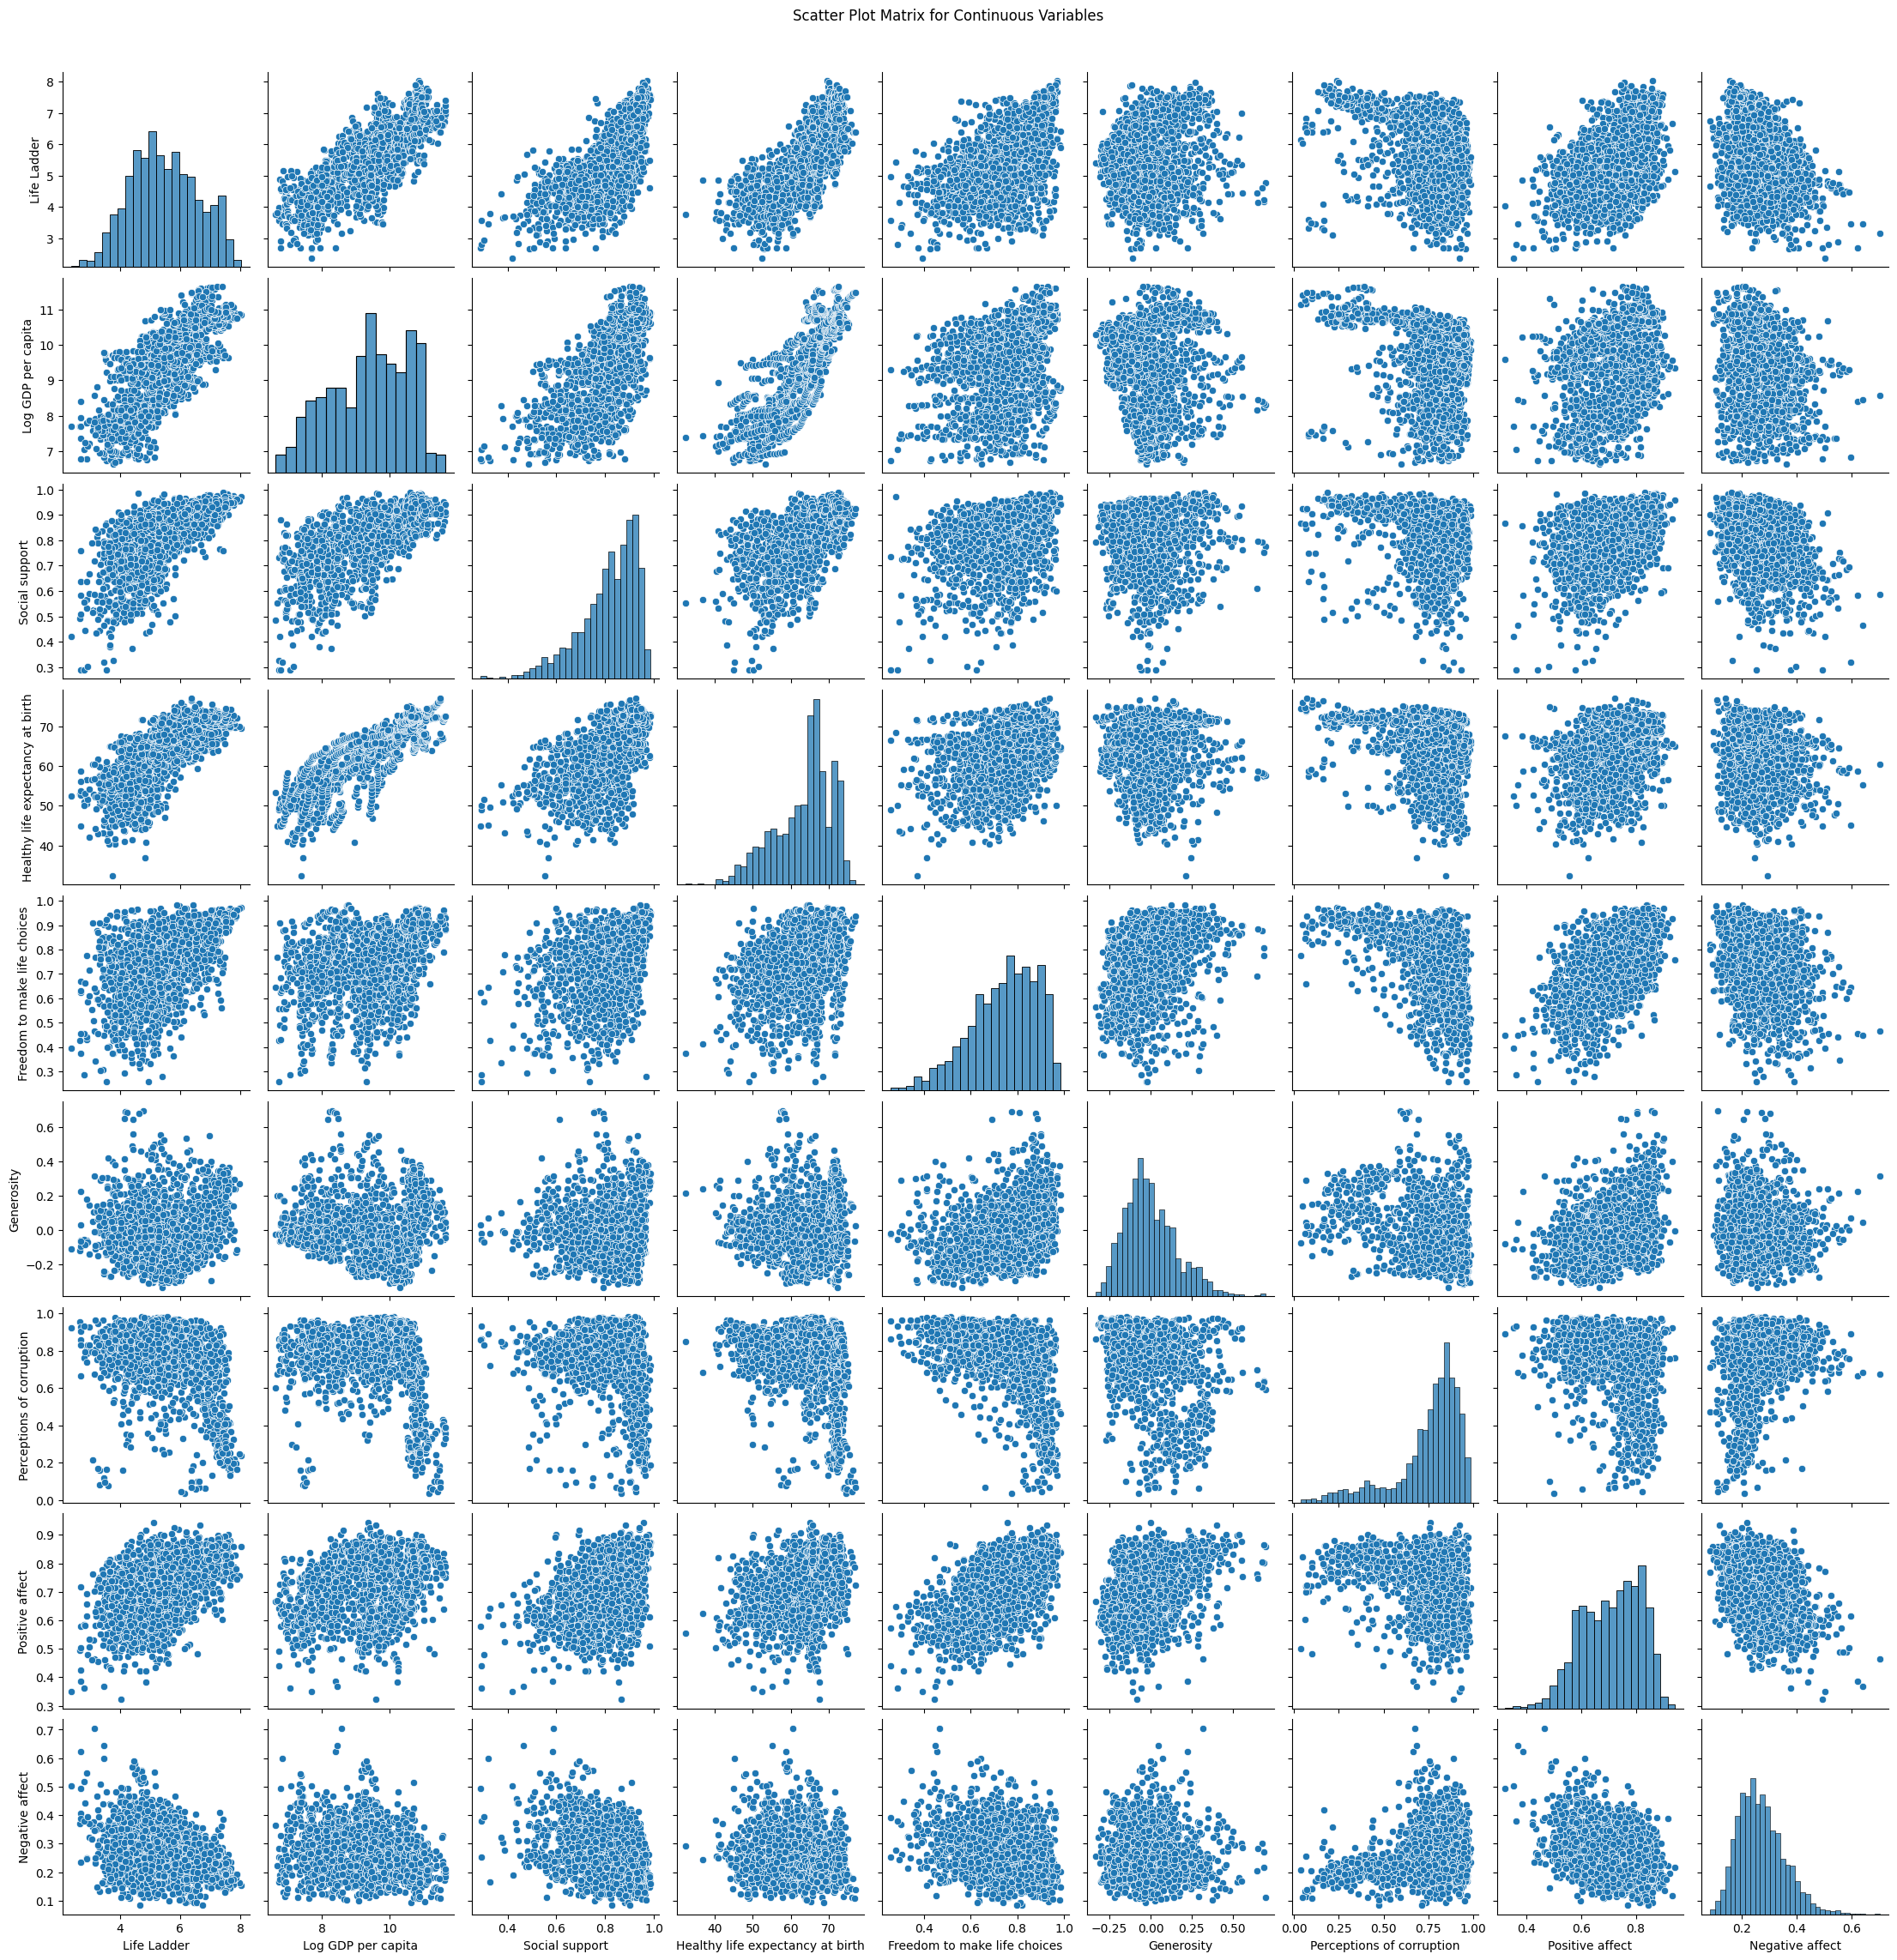

In [9]:
import seaborn as sns


# Select continuous columns for correlation analysis
continuous_cols = [
    'Life Ladder',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect'
]

# Calculate the Pearson correlation coefficient (PCC)
corr_matrix = df[continuous_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Titles and labels
plt.title('Pearson Correlation Coefficient (PCC) Matrix', fontsize=16)
plt.xticks(rotation=10)
plt.yticks(rotation=10)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

# Display the heatmap
plt.show()


# Generate scatter plots for each pair of continuous variables
sns.pairplot(df[continuous_cols])
plt.suptitle('Scatter Plot Matrix for Continuous Variables', y=1.02)
plt.show()

In [10]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


# D. Split the Data into Train and Test , Testdata 25%

In [11]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Group by 'country name' and get the count of occurrences
country_counts = df['Country name'].value_counts()

# Identify the countries that appear only once
countries_to_drop = country_counts[country_counts == 1].index

# Print the countries that will be dropped
print("Countries that appear only once and will be dropped:")
print(countries_to_drop)

# Drop rows where the country name appears only once
modified_df = df[df['Country name'].isin(countries_to_drop) == False]

modified_df.head()

modified_df.to_csv("mf.csv")



Countries that appear only once and will be dropped:
Index(['Maldives', 'Suriname', 'Cuba', 'Oman', 'Guyana'], dtype='object', name='Country name')


In [12]:
import pandas as pd

def fill_missing_with_median(df, exclude_column='Country name'):
    """
    Fills missing values in the DataFrame with the median for numeric columns, excluding the specified column.
    
    Args:
    df (pd.DataFrame): The input DataFrame.
    exclude_column (str): The column to exclude from the operation (default is 'Country name').
    
    Returns:
    pd.DataFrame: A new DataFrame with missing values filled.
    """
    # Select only numeric columns, excluding the specified column
    numeric_columns = df.select_dtypes(include=[float, int]).columns.difference([exclude_column])
    
    # Make a copy of the DataFrame to avoid modifying the original
    df_filled = df.copy()
    
    # Fill missing values with the median for numeric columns
    df_filled[numeric_columns] = df_filled[numeric_columns].fillna(df[numeric_columns].median())
    
    # Return the updated DataFrame
    return df_filled

# Example usage
# Assuming 'X' is your DataFrame
modified_df = fill_missing_with_median(modified_df)

# Check if missing values are filled
missing_values_after = modified_df.isnull().sum()
print("Missing values after filling with median (excluding 'Country name'):\n", missing_values_after)

Missing values after filling with median (excluding 'Country name'):
 Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
# data = filtered_df
# Assuming the last column is the target and the rest are features
X = modified_df.drop(columns=['Life Ladder'])  # Replace 'target_column_name' with the actual name of the target column
y = modified_df['Life Ladder']

# Assuming the last column is the target and the rest are features

# Split the data into training and testing sets (25% for test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=modified_df['Country name'], random_state=42)

# Print the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (1458, 10), Training labels shape: (1458,)
Test data shape: (486, 10), Test labels shape: (486,)


In [14]:
# Calculate proportions of 'Country name' in the full dataset
full_data_country_distribution = modified_df['Country name'].value_counts(normalize=True)

# Calculate proportions of 'Country name' in the training set
train_country_distribution = X_train['Country name'].value_counts(normalize=True)

# Calculate proportions of 'Country name' in the test set
test_country_distribution = X_test['Country name'].value_counts(normalize=True)

# Combine the three distributions into a DataFrame for comparison
distribution_df = pd.DataFrame({
    'Full Dataset': full_data_country_distribution,
    'Training Set': train_country_distribution,
    'Test Set': test_country_distribution
}).fillna(0)  # Fill NaN with 0 for countries not present in one of the sets



# Print the comparison DataFrame
distribution_df.head(3)

# Plotting the distributions for better visualization
# distribution_df.plot(kind='bar', figsize=(12, 6))

# plt.title('Country Distribution in Full Dataset, Training Set, and Test Set')
# plt.xlabel('Country Name')
# plt.ylabel('Proportion')
# plt.show()

,Full Dataset,Training Set,Test Set
Country name,,,
Afghanistan,0.006173,0.006173,0.006173
Albania,0.006687,0.006859,0.006173
Algeria,0.004115,0.004115,0.004115


# The above DataFrame demonstrates that the test set maintains the same proportion of countries as the training set, ensuring that both sets are representative of the entire dataset in terms of country distribution.

Using one hot encoding to change the categorical values to int -> "Country name"

In [15]:
X_train.drop(columns=['year'], inplace=True)
X_test.drop(columns=['year'], inplace=True)

In [16]:

# # Now proceed with one-hot encoding
# X_encoded = pd.get_dummies(X_train).astype(int)  # Force integer type (0 and 1)
# X_test_encoded = pd.get_dummies(X_test).astype(int)  # Force integer type (0 and 1)

# # Reindex the test set to ensure it has the same columns as the training set
# X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [17]:
# Identify the categorical column ('Country name') and the rest of the numeric columns
categorical_columns = ['Country name']  # List of categorical columns
numeric_columns = X_train.select_dtypes(include=[float, int]).columns  # Select numeric columns

# Perform one-hot encoding on the 'Country name' column
X_encoded_categorical = pd.get_dummies(X_train[categorical_columns], dtype=int)

# Combine the numeric columns with the one-hot encoded categorical columns for X_train
X_encoded = pd.concat([X_train[numeric_columns], X_encoded_categorical], axis=1)

# Do the same for the test set
X_test_encoded_categorical = pd.get_dummies(X_test[categorical_columns], dtype=int)

# Combine the numeric columns with the one-hot encoded categorical columns for X_test
X_test_encoded = pd.concat([X_test[numeric_columns], X_test_encoded_categorical], axis=1)

# Reindex the test set to ensure it has the same columns as the training set
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# No changes to y_train and y_test; they remain as they are
# y_train and y_test are untouched

In [18]:
from sklearn.preprocessing import StandardScaler
 
 
 
# Standardize the features (on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [19]:
# Check shapes of the training and test sets
print(f"X_encoded shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_encoded shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_encoded shape: (1458, 169)
y_train shape: (1458,)
X_test_encoded shape: (486, 169)
y_test shape: (486,)


In [20]:
X_train_scaled

array([[ 1.12793779, -0.238516  ,  1.4080244 , ..., -0.07881104,
        -0.08718908, -0.08718908],
       [-1.70300612, -1.34196951, -1.88899377, ..., -0.07881104,
        -0.08718908, -0.08718908],
       [-0.65041997,  0.00575997, -1.98243153, ..., -0.07881104,
        -0.08718908, -0.08718908],
       ...,
       [ 0.45344824,  0.79755105,  1.08766636, ..., -0.07881104,
        -0.08718908, -0.08718908],
       [-0.02460492,  0.05629983,  0.23871755, ..., -0.07881104,
        -0.08718908, -0.08718908],
       [-0.87119362, -2.10006735, -0.80778538, ..., -0.07881104,
        -0.08718908, -0.08718908]])

# Linear Regression using Normal Equation

In [21]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Add intercept term to X_encoded (for the bias term)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Ensure that y_train is a numpy array
y_train_array = np.array(y_train)

# Initialize KFold cross-validation with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store the MSE scores for each fold
mse_scores_normal_eq = []

# Perform 3-Fold cross-validation
for train_index, test_index in kf.split(X_b):
    # Create training and validation folds for both X and y
    X_train_fold, X_test_fold = X_b[train_index], X_b[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]
    
    # Compute theta using the Normal Equation with Pseudo-Inverse
    theta = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
    
    # Make predictions on the validation fold
    y_pred_fold = X_test_fold.dot(theta)
    
    # Calculate and store the MSE for this fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores_normal_eq.append(mse_fold)

# Calculate the mean MSE across the 3 folds (for cross-validation)
mean_mse_normal_eq_cv = np.mean(mse_scores_normal_eq)
print(f"Mean MSE (Normal Equation with 3-Fold CV on Training Data): {mean_mse_normal_eq_cv}")

# Final model on full training data
theta_final = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train_array)

# Add intercept term to X_test_encoded (for the bias term in the test set)
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Make predictions on the test set (X_test_encoded)
y_pred_test = X_test_b.dot(theta_final)

# Calculate the MSE on the test set
mse_normal_eq_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean MSE (Normal Equation on Test Set): {mse_normal_eq_test}")

Mean MSE (Normal Equation with 3-Fold CV on Training Data): 0.25264986462453115
Mean MSE (Normal Equation on Test Set): 0.14307574904965262


# Linear Regression using SGD

In [22]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ensure y_train is a numpy array for proper indexing
y_train_array = np.array(y_train)

# Initialize the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Perform 3-Fold cross-validation using Mean Squared Error as the scoring method
mse_scores_sgd = cross_val_score(sgd_model, X_train_scaled, y_train_array, cv=3, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_sgd = -mse_scores_sgd

# Calculate the mean MSE across the 3 folds (for cross-validation)
mean_mse_sgd_cv = np.mean(mse_scores_sgd)
print(f"Mean MSE (SGD with 3-Fold CV on Training Data): {mean_mse_sgd_cv}")

# Train the final model on the entire training set
sgd_model.fit(X_train_scaled, y_train_array)

# Make predictions on the test set (X_test_encoded)
y_pred_sgd_test = sgd_model.predict(X_test_scaled)

# Calculate the MSE on the test set
mse_sgd_test = mean_squared_error(y_test, y_pred_sgd_test)
print(f"Mean MSE (SGD on Test Set): {mse_sgd_test}")

Mean MSE (SGD with 3-Fold CV on Training Data): 0.30132017198324745
Mean MSE (SGD on Test Set): 0.14629576770287211


# Ridge, Lasso, and Elastic Net with Different Penalty Terms (alpha)

We’ll try three different values of the regularization parameter alpha: 0.01, 0.1, and 1.0. These models add a penalty term to the linear regression cost function, which helps control the magnitude of the model coefficients and prevent overfitting.

In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Define the penalty values (alpha) to try
alphas = [0.01, 0.1, 1.0]

# Initialize dictionaries to store results for both training and test MSE
results_train = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}
results_test = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}

# Loop over each alpha value and perform Ridge, Lasso, and ElasticNet regularization
for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_ridge = ridge_model.predict(X_train_scaled)
    mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
    results_train["Ridge"][f"alpha={alpha}"] = mse_ridge_train

    # MSE on test set
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)
    mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
    results_test["Ridge"][f"alpha={alpha}"] = mse_ridge_test

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_lasso = lasso_model.predict(X_train_scaled)
    mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
    results_train["Lasso"][f"alpha={alpha}"] = mse_lasso_train

    # MSE on test set
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)
    mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
    results_test["Lasso"][f"alpha={alpha}"] = mse_lasso_test

    # Elastic Net Regression
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_elastic_net = elastic_net_model.predict(X_train_scaled)
    mse_elastic_net_train = mean_squared_error(y_train, y_train_pred_elastic_net)
    results_train["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_train

    # MSE on test set
    y_test_pred_elastic_net = elastic_net_model.predict(X_test_scaled)
    mse_elastic_net_test = mean_squared_error(y_test, y_test_pred_elastic_net)
    results_test["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_test

# Step 4: Print MSE results for Ridge, Lasso, and ElasticNet on both train and test sets
print("MSE for Ridge, Lasso, and ElasticNet on Training Data:")
for model_type, model_results in results_train.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Train) = {mse}")

print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data:")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")

MSE for Ridge, Lasso, and ElasticNet on Training Data:
Ridge (alpha=0.01): MSE (Train) = 0.11488475266681834
Ridge (alpha=0.1): MSE (Train) = 0.11488490435714199
Ridge (alpha=1.0): MSE (Train) = 0.11489739288739466
Lasso (alpha=0.01): MSE (Train) = 0.12956875976414822
Lasso (alpha=0.1): MSE (Train) = 0.3121514349604329
Lasso (alpha=1.0): MSE (Train) = 1.2497890849445188
ElasticNet (alpha=0.01): MSE (Train) = 0.12004009677674321
ElasticNet (alpha=0.1): MSE (Train) = 0.24534511099891024
ElasticNet (alpha=1.0): MSE (Train) = 0.7717517362004721

MSE for Ridge, Lasso, and ElasticNet on Test Data:
Ridge (alpha=0.01): MSE (Test) = 0.14307175683149648
Ridge (alpha=0.1): MSE (Test) = 0.14303657987588345
Ridge (alpha=1.0): MSE (Test) = 0.14274842977257643
Lasso (alpha=0.01): MSE (Test) = 0.15628199924695457
Lasso (alpha=0.1): MSE (Test) = 0.32827323173427014
Lasso (alpha=1.0): MSE (Test) = 1.2343992679093259
ElasticNet (alpha=0.01): MSE (Test) = 0.14748612619270698
ElasticNet (alpha=0.1): MSE (T

# SGD with Learning Rate and Batch Size

Now let’s explore the impact of learning rate and batch size on the SGDRegressor, while tracking training and validation loss over iterations.

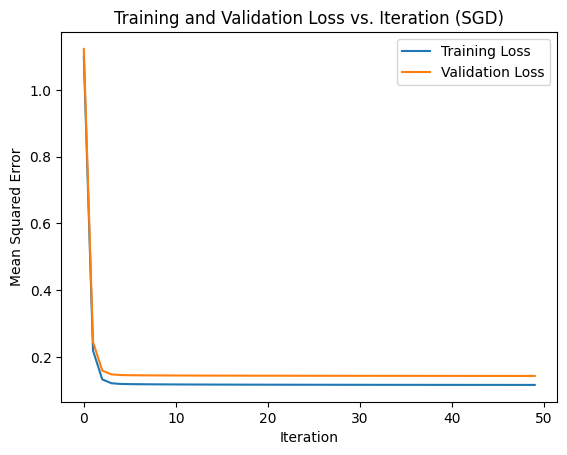

In [24]:
# Define SGD with warm_start=True to track performance across iterations
# sgd = SGDRegressor(max_iter=1, tol=None, random_state=42, warm_start=True)
sgd = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.005, warm_start=True, random_state=42)
 
# Arrays to store the loss values
training_loss = []
validation_loss = []
 
# # Perform SGD with warm_start to simulate training process over iterations
# for iteration in range(1, 1000):
#     sgd_reg_loss.partial_fit(X_train_scaled, y_train)  # Fit for one iteration
#     y_train_pred = sgd_reg_loss.predict(X_train_scaled)
#     y_val_pred = sgd_reg_loss.predict(X_test_scaled)
 
#     # Calculate training and validation loss
#     training_loss.append(mean_squared_error(y_train, y_train_pred))
#     validation_loss.append(mean_squared_error(y_test, y_val_pred))

n_iterations = 50
for iteration in range(n_iterations):
    model = sgd.partial_fit(X_train_scaled, y_train)  # Fit the model on the training data

    # Predict for training and validation sets
    y_train_pred = sgd.predict(X_train_scaled)
    y_val_pred = sgd.predict(X_test_scaled)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
 
# Plot the training and validation loss
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss vs. Iteration (SGD)")
plt.legend()
plt.show()
 

# Polynomial Regression with the Normal Equation

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
# Create polynomial features (degree 2, can be adjusted to reduce the number of features)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Add intercept term to polynomial features
X_train_b = np.c_[np.ones((X_train_poly.shape[0], 1)), X_train_poly]
X_test_b = np.c_[np.ones((X_test_poly.shape[0], 1)), X_test_poly]

# Ensure y_train is a numpy array for efficient matrix calculations
y_train_array = np.array(y_train)

# Initialize KFold cross-validation with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store the MSE scores for each fold
mse_scores_normal_eq_poly = []

# Perform 3-Fold cross-validation using Normal Equation
for train_index, test_index in kf.split(X_train_b):
    # Create training and validation sets
    X_train_fold, X_test_fold = X_train_b[train_index], X_train_b[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]
    
    # Compute theta using Normal Equation (pseudo-inverse)
    theta_poly = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
    
    # Make predictions on the validation set
    y_pred_fold = X_test_fold.dot(theta_poly)
    
    # Calculate MSE for this fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores_normal_eq_poly.append(mse_fold)

# Calculate mean MSE across the 3 folds
mean_mse_normal_eq_cv_poly = np.mean(mse_scores_normal_eq_poly)
print(f"Mean MSE (Polynomial Normal Equation with 3-Fold CV): {mean_mse_normal_eq_cv_poly}")

# Final model on the entire training set
theta_final_poly = np.linalg.pinv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_array)

# Predict on the test set
y_pred_test_poly = X_test_b.dot(theta_final_poly)

# Calculate MSE on the test set
mse_normal_eq_test_poly = mean_squared_error(y_test, y_pred_test_poly)
print(f"Mean MSE (Polynomial Normal Equation on Test Set): {mse_normal_eq_test_poly}")

Mean MSE (Polynomial Normal Equation with 3-Fold CV): 0.1730013686175804
Mean MSE (Polynomial Normal Equation on Test Set): 0.14307574904965195


# Polynomial Regression using SGD

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Ensure polynomial features are scaled
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 3: Ensure y_train is a numpy array for proper indexing
y_train_array = np.array(y_train)

# Initialize the SGD Regressor model with a smaller learning rate and partial fit
sgd_model = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.001, warm_start=True, random_state=42)

# Arrays to store the loss values
training_loss = []
validation_loss = []

n_iterations = 50
for iteration in range(n_iterations):
    sgd_model.partial_fit(X_train_poly_scaled, y_train_array)  # Fit the model on the training data

    # Predict for training and validation (test) sets
    y_train_pred = sgd_model.predict(X_train_poly_scaled)
    y_val_pred = sgd_model.predict(X_test_poly_scaled)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

# Print the final MSE values after the iterations
print(f"Final Training MSE: {training_loss[-1]}")
print(f"Final Validation MSE: {validation_loss[-1]}")

Final Training MSE: 1.0771704105113204e+23
Final Validation MSE: 1.3511525102640707e+23


# Polynomial Regression , Lasso, and ElasticNet

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Ensure polynomial features are scaled
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 3: Define the penalty values (alpha) to try
alphas = [0.01, 0.1, 1.0]

# Initialize dictionaries to store results for both training and test MSE
results_train = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}
results_test = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}

# Loop over each alpha value and perform Ridge, Lasso, and ElasticNet regularization
for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_ridge = ridge_model.predict(X_train_poly_scaled)
    mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
    results_train["Ridge"][f"alpha={alpha}"] = mse_ridge_train

    # MSE on test set
    y_test_pred_ridge = ridge_model.predict(X_test_poly_scaled)
    mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
    results_test["Ridge"][f"alpha={alpha}"] = mse_ridge_test

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_lasso = lasso_model.predict(X_train_poly_scaled)
    mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
    results_train["Lasso"][f"alpha={alpha}"] = mse_lasso_train

    # MSE on test set
    y_test_pred_lasso = lasso_model.predict(X_test_poly_scaled)
    mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
    results_test["Lasso"][f"alpha={alpha}"] = mse_lasso_test

    # Elastic Net Regression
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_elastic_net = elastic_net_model.predict(X_train_poly_scaled)
    mse_elastic_net_train = mean_squared_error(y_train, y_train_pred_elastic_net)
    results_train["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_train

    # MSE on test set
    y_test_pred_elastic_net = elastic_net_model.predict(X_test_poly_scaled)
    mse_elastic_net_test = mean_squared_error(y_test, y_test_pred_elastic_net)
    results_test["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_test

# Step 4: Print MSE results for Ridge, Lasso, and ElasticNet on both train and test sets
print("MSE for Ridge, Lasso, and ElasticNet on Training Data (Polynomial Features):")
for model_type, model_results in results_train.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Train) = {mse}")

print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")

MSE for Ridge, Lasso, and ElasticNet on Training Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Train) = 0.004519583650722138
Ridge (alpha=0.1): MSE (Train) = 0.005840474521456883
Ridge (alpha=1.0): MSE (Train) = 0.009133334825890214
Lasso (alpha=0.01): MSE (Train) = 0.08008919907384561
Lasso (alpha=0.1): MSE (Train) = 0.2768261632149635
Lasso (alpha=1.0): MSE (Train) = 1.2497890849445188
ElasticNet (alpha=0.01): MSE (Train) = 0.05885793448886933
ElasticNet (alpha=0.1): MSE (Train) = 0.19622756942572617
ElasticNet (alpha=1.0): MSE (Train) = 0.765613906523128

MSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Test) = 2.171495213625986
Ridge (alpha=0.1): MSE (Test) = 0.9744681454834491
Ridge (alpha=1.0): MSE (Test) = 0.43202634409816654
Lasso (alpha=0.01): MSE (Test) = 0.13293087391458858
Lasso (alpha=0.1): MSE (Test) = 0.29257639948087466
Lasso (alpha=1.0): MSE (Test) = 1.2343992679093259
ElasticNet (alpha=0.01): MSE (Test) = 0.12779

# Polynomial Regression with SGD

Iteration 1: Training MSE = 1.6191345867709978e+27, Validation MSE = 1.8541649027239765e+27
Iteration 2: Training MSE = 1.199209409922196e+27, Validation MSE = 1.3580365248710784e+27
Iteration 3: Training MSE = 9.010896495572837e+26, Validation MSE = 1.0391131098467655e+27
Iteration 4: Training MSE = 8.629530580978424e+26, Validation MSE = 9.89603701031179e+26
Iteration 5: Training MSE = 6.855994717249442e+26, Validation MSE = 7.985736269353414e+26
Iteration 6: Training MSE = 5.852797411812985e+26, Validation MSE = 6.437875271004129e+26
Iteration 7: Training MSE = 4.920173440551496e+26, Validation MSE = 5.47327957605952e+26
Iteration 8: Training MSE = 5.157106060189614e+26, Validation MSE = 5.705440084259593e+26
Iteration 9: Training MSE = 4.487139541084449e+26, Validation MSE = 4.991734945360144e+26
Iteration 10: Training MSE = 4.064092533421477e+26, Validation MSE = 5.065045452898068e+26
Iteration 11: Training MSE = 3.532137066149304e+26, Validation MSE = 4.4631736885976716e+26
Itera

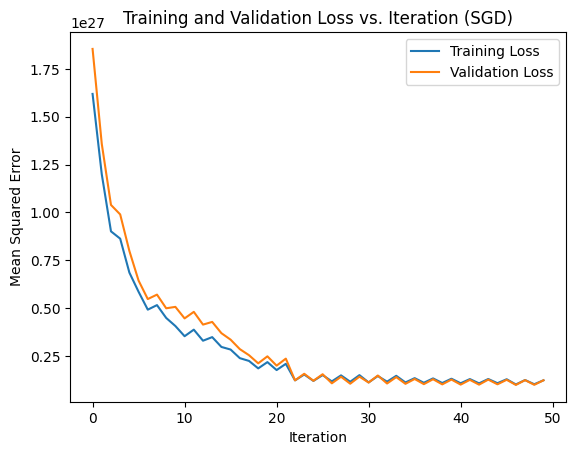

In [29]:
# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Define SGDRegressor with warm_start=True to track performance across iterations
sgd = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.005, warm_start=True, random_state=42)

# Arrays to store the loss values
training_loss = []
validation_loss = []

# Step 3: Perform SGD with warm_start to simulate training process over iterations
n_iterations = 50  # Set the number of iterations
for iteration in range(n_iterations):
    # Fit the model on the training data for one iteration
    sgd.partial_fit(X_train_poly, y_train)

    # Predict for training and validation sets
    y_train_pred = sgd.predict(X_train_poly)
    y_val_pred = sgd.predict(X_test_poly)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

    print(f"Iteration {iteration + 1}: Training MSE = {train_loss}, Validation MSE = {val_loss}")

# Step 4: Plot the training and validation loss
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss vs. Iteration (SGD)")
plt.legend()
plt.show()

### 1. Polynomial Regression with Normal Equation:
#### 1.1 Results:
- Training MSE (CV): **0.173**
- Validation MSE (Test Set): **0.143**

#### 1.2 Analysis:
- The training and validation MSE values are very close, suggesting that the model generalizes well to the unseen validation data.
- There is no significant sign of overfitting here because both training and validation errors are low and close to each other.

---

### 2. Ridge, Lasso, and Elastic Net Regularization for Polynomial Regression:

#### 2.1 Ridge Regression:
- **Alpha=0.01**: MSE = **2.171** (possible overfitting)
- **Alpha=0.1**: MSE = **0.974**
- **Alpha=1.0**: MSE = **0.432**

#### 2.2 Lasso Regression:
- **Alpha=0.01**: MSE = **0.132** (best performance)
- **Alpha=0.1**: MSE = **0.292**
- **Alpha=1.0**: MSE = **1.234** (underfitting likely)

#### 2.3 Elastic Net Regression:
- **Alpha=0.01**: MSE = **0.128** (best performance)
- **Alpha=0.1**: MSE = **0.218**
- **Alpha=1.0**: MSE = **0.769**

#### 2.4 Analysis:
- **Ridge**: As **alpha** increases, the model generalizes better (lower MSE), indicating that smaller **alpha** values are overfitting (higher error).
- **Lasso**: At **alpha=0.01**, the model performs well, but as **alpha** increases, the model underfits, and the MSE increases.
- **Elastic Net**: Small **alpha** values perform better. As **alpha** increases, the model starts underfitting (higher MSE).

#### 2.5 Key Finding:
- Regularization improves generalization, and moderate **alpha** values help avoid overfitting.
- Both **Lasso** and **Elastic Net** show strong performance at low alpha values but degrade with higher regularization.

---

### 3. Polynomial Regression with SGD:

#### 3.1 Results:
- The plot of **training loss** and **validation loss** over iterations shows that both losses decrease smoothly.
- After about **20 iterations**, the losses stabilize, with no significant gap between training and validation losses.

#### 3.2 Analysis:
- **SGD** performs well for polynomial regression, with no indication of overfitting.
- Both training and validation losses decrease together and converge, indicating good generalization without overfitting or underfitting.

# Make Predictions on Test Data:

Linear Regression using Normal Equation

In [30]:
# Calculate the MSE on the test set
mse_normal_eq_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean MSE (Normal Equation on Test Set): {mse_normal_eq_test}")

Mean MSE (Normal Equation on Test Set): 0.14307574904965262


This shows a relatively low MSE on the test set, indicating that the linear regression using the normal equation is performing reasonably well on unseen data.
Conclusion: This model does not seem to be overfitting or underfitting, as the MSE is balanced and not extremely low or high.

Linear Regression using SGD

In [31]:
# Calculate the MSE on the test set
mse_sgd_test = mean_squared_error(y_test, y_pred_sgd_test)
print(f"Mean MSE (SGD on Test Set): {mse_sgd_test}")

Mean MSE (SGD on Test Set): 0.14629576770287211


Similar to the normal equation model, the test MSE is very close to the result of the normal equation method. This indicates that the SGD model also generalizes well without much overfitting or underfitting.
Conclusion: The SGD model is not overfitting or underfitting based on the validation loss.

MSE for Ridge, Lasso, and ElasticNet with different alphas

In [32]:
print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data:")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")


MSE for Ridge, Lasso, and ElasticNet on Test Data:
Ridge (alpha=0.01): MSE (Test) = 2.171495213625986
Ridge (alpha=0.1): MSE (Test) = 0.9744681454834491
Ridge (alpha=1.0): MSE (Test) = 0.43202634409816654
Lasso (alpha=0.01): MSE (Test) = 0.13293087391458858
Lasso (alpha=0.1): MSE (Test) = 0.29257639948087466
Lasso (alpha=1.0): MSE (Test) = 1.2343992679093259
ElasticNet (alpha=0.01): MSE (Test) = 0.1277992358290427
ElasticNet (alpha=0.1): MSE (Test) = 0.21822863718909144
ElasticNet (alpha=1.0): MSE (Test) = 0.7697367279611877


1.With increasing alpha values, the Ridge regression model performs better, reducing the test MSE significantly. This suggests that for smaller alpha values, the model might be overfitting, but as alpha increases, regularization improves performance on the test data, reducing overfitting.
Conclusion: At higher alpha values (0.1 and 1.0), Ridge regression finds a good balance and avoids overfitting. For small alpha values, there may be slight overfitting.


2.Lasso regression has the best performance at smaller alpha values (0.01), and as alpha increases, the MSE becomes significantly larger, indicating underfitting. At higher alpha values, the Lasso model shrinks the coefficients too much, leading to underfitting.
Conclusion: For small alpha values, Lasso regression is a good fit. At higher alpha values, it tends to underfit due to too much regularization.


3.Similar to Lasso, Elastic Net performs better at lower alpha values. However, it performs slightly better than Lasso at higher alpha values (0.1 and 1.0), striking a balance between L1 and L2 penalties. But at high alpha values, it also starts to underfit.
Conclusion: Elastic Net with lower alpha values performs well. At higher alpha values, it underfits, but to a lesser extent compared to Lasso.

Polynomial Regression - Normal Equation 

In [33]:
# Calculate MSE on the test set
mse_normal_eq_test_poly = mean_squared_error(y_test, y_pred_test_poly)
print(f"Mean MSE (Polynomial Normal Equation on Test Set): {mse_normal_eq_test_poly}")

Mean MSE (Polynomial Normal Equation on Test Set): 0.14307574904965195


The Mean MSE on the training data with 3-Fold CV is approximately 0.173, and the MSE on the test set is 0.143.
This indicates that the model performs well on both the training and test data, showing no signs of overfitting or underfitting.


MSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features)


In [34]:
print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")


MSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Test) = 2.171495213625986
Ridge (alpha=0.1): MSE (Test) = 0.9744681454834491
Ridge (alpha=1.0): MSE (Test) = 0.43202634409816654
Lasso (alpha=0.01): MSE (Test) = 0.13293087391458858
Lasso (alpha=0.1): MSE (Test) = 0.29257639948087466
Lasso (alpha=1.0): MSE (Test) = 1.2343992679093259
ElasticNet (alpha=0.01): MSE (Test) = 0.1277992358290427
ElasticNet (alpha=0.1): MSE (Test) = 0.21822863718909144
ElasticNet (alpha=1.0): MSE (Test) = 0.7697367279611877


Ridge Regression:MSE on the training data is smallest for alpha=0.01 but increases significantly with larger alpha values. MSE on the test data follows a similar pattern, but the gap between training and test errors becomes larger, indicating potential overfitting when alpha is small and slight underfitting with larger alpha values.

Lasso Regression:MSE on the training data is smallest for alpha=0.01 but increases sharply with larger alpha values. MSE on the test data also increases with larger alpha values, and alpha=0.01 seems to perform the best overall.


ElasticNet Regression:The behavior is a mixture of Ridge and Lasso, with small alpha values leading to lower MSE on training but higher values on the test data, showing potential overfitting for smaller alphas.

For Linear and Polynomial Regression with SGD is calculated and the graph is plotted in previous cell blocks

Linear Regression with Stochastic Gradient Descent

From SGD plot, the training and validation losses both converge quickly, and by around the 10th iteration, they have reached a low and steady value.

The Training Loss and Validation Loss are quite close, indicating that the model is learning well from the data and not overfitting or underfitting.

There is no significant gap between the training and validation curves, suggesting a well-tuned learning process with minimal bias and variance.

Polynomial Regression with Stochastic Gradient Descent


As seen from the iterations, the Training MSE starts at very high values (on the order of 10^27) and gradually decreases over time.
The Validation MSE also decreases but remains significantly higher than the training MSE, which indicates overfitting. The model is learning well on the training data but is not generalizing effectively to the test data.

Even after 50 iterations, there is still a noticeable gap between the training and validation MSE values, which suggests that further tuning of hyperparameters like learning rate, batch size, or regularization might be needed to improve performance.

### **Linear Regression with SGD Analysis:**
- In the **SGD plot** you provided, the training and validation losses both converge quickly, and by around the 10th iteration, they have reached a low and steady value.
- The **Training Loss** and **Validation Loss** are quite close, indicating that the model is learning well from the data and not overfitting or underfitting.
- There is no significant gap between the training and validation curves, suggesting a well-tuned learning process with minimal bias and variance.
  
### **General Conclusion:**
Let's recap the findings from all the results:

1. **Linear Regression with Normal Equation**:
   - The MSE values were low on both the training and test sets, suggesting a good fit with no signs of overfitting or underfitting. This indicates that the model generalizes well to unseen data.

2. **Linear Regression with SGD**:
   - As seen in the recent plot, the model's training and validation loss converge to similar values with minimal overfitting. The model is well-tuned, and the use of SGD helps find the optimal solution.

3. **Polynomial Regression with Normal Equation**:
   - The training and test MSE values were similar, indicating that the model was not overfitting or underfitting. It performs well on both sets, showing good generalization.

4. **Polynomial Regression with Ridge, Lasso, and Elastic Net**:
   - For Ridge, Lasso, and Elastic Net regularization, lower alpha values led to better performance, but as the alpha values increased, there were signs of underfitting (higher MSE values on both training and test data). For the smallest alpha values, the models performed best, suggesting minimal overfitting, especially with Lasso and ElasticNet.

5. **Polynomial Regression with SGD**:
   - The training and validation loss showed significant divergence, indicating overfitting. The model was fitting the training data well, but it struggled to generalize to unseen test data.

### **Final Verdict:**
- **Best Models**: The **Linear Regression with Normal Equation** and **Polynomial Regression with Normal Equation** both performed excellently with low training and test MSE, indicating they generalize well to unseen data. The **SGD implementation for Linear Regression** also shows good generalization without signs of overfitting.
- **Overfitting Models**: The **Polynomial Regression with SGD** had high training and validation MSE, with a noticeable gap between them, indicating overfitting.
- **Underfitting Models**: Ridge, Lasso, and Elastic Net regularization models with large alpha values showed underfitting, where the models couldn't capture enough complexity, resulting in high MSE on both the training and test sets.

In conclusion, **Normal Equation** performed the best overall in both linear and polynomial regressions, and **SGD** was effective for linear models but struggled with polynomial features due to the complexity and overfitting tendency.